In [1]:
!!pip install opendatasets
import opendatasets as od

od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset/data")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rishov0007
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset


100%|██████████| 2.70G/2.70G [00:21<00:00, 137MB/s]


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense ,BatchNormalization ,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import warnings
warnings.filterwarnings('ignore')


In [3]:
train_dir = 'new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = 'new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_dir = 'new-plant-diseases-dataset/test/test'

In [4]:

def count_files_and_classes(directory):
    file_count = 0
    class_counts = {}
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            files_in_class = len([f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))])
            class_counts[class_name] = files_in_class
            file_count += files_in_class
    return file_count, class_counts

# Count files and classes in train_dir
train_file_count, train_class_counts = count_files_and_classes(train_dir)
print(f"Total files in train_dir: {train_file_count}")
print("Files per class in train_dir:")
for class_name, count in train_class_counts.items():
    print(f"  {class_name}: {count}")

# Count files and classes in valid_dir
valid_file_count, valid_class_counts = count_files_and_classes(valid_dir)
print(f"\nTotal files in valid_dir: {valid_file_count}")
print("Files per class in valid_dir:")
for class_name, count in valid_class_counts.items():
    print(f"  {class_name}: {count}")


Total files in train_dir: 70295
Files per class in train_dir:
  Cherry_(including_sour)___Powdery_mildew: 1683
  Grape___healthy: 1692
  Cherry_(including_sour)___healthy: 1826
  Orange___Haunglongbing_(Citrus_greening): 2010
  Corn_(maize)___Common_rust_: 1907
  Peach___Bacterial_spot: 1838
  Potato___healthy: 1824
  Tomato___Target_Spot: 1827
  Tomato___Late_blight: 1851
  Apple___healthy: 2008
  Tomato___Spider_mites Two-spotted_spider_mite: 1741
  Tomato___Tomato_Yellow_Leaf_Curl_Virus: 1961
  Grape___Black_rot: 1888
  Tomato___Bacterial_spot: 1702
  Corn_(maize)___healthy: 1859
  Apple___Apple_scab: 2016
  Tomato___Tomato_mosaic_virus: 1790
  Soybean___healthy: 2022
  Tomato___Septoria_leaf_spot: 1745
  Raspberry___healthy: 1781
  Strawberry___healthy: 1824
  Corn_(maize)___Northern_Leaf_Blight: 1908
  Tomato___healthy: 1926
  Squash___Powdery_mildew: 1736
  Peach___healthy: 1728
  Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1722
  Tomato___Early_blight: 1920
  Potato___Early_blig

In [5]:

test_file_count = len([f for f in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir, f))])
print(f"\nTotal files in test_dir: {test_file_count}")


Total files in test_dir: 33


<Figure size 1500x1000 with 0 Axes>

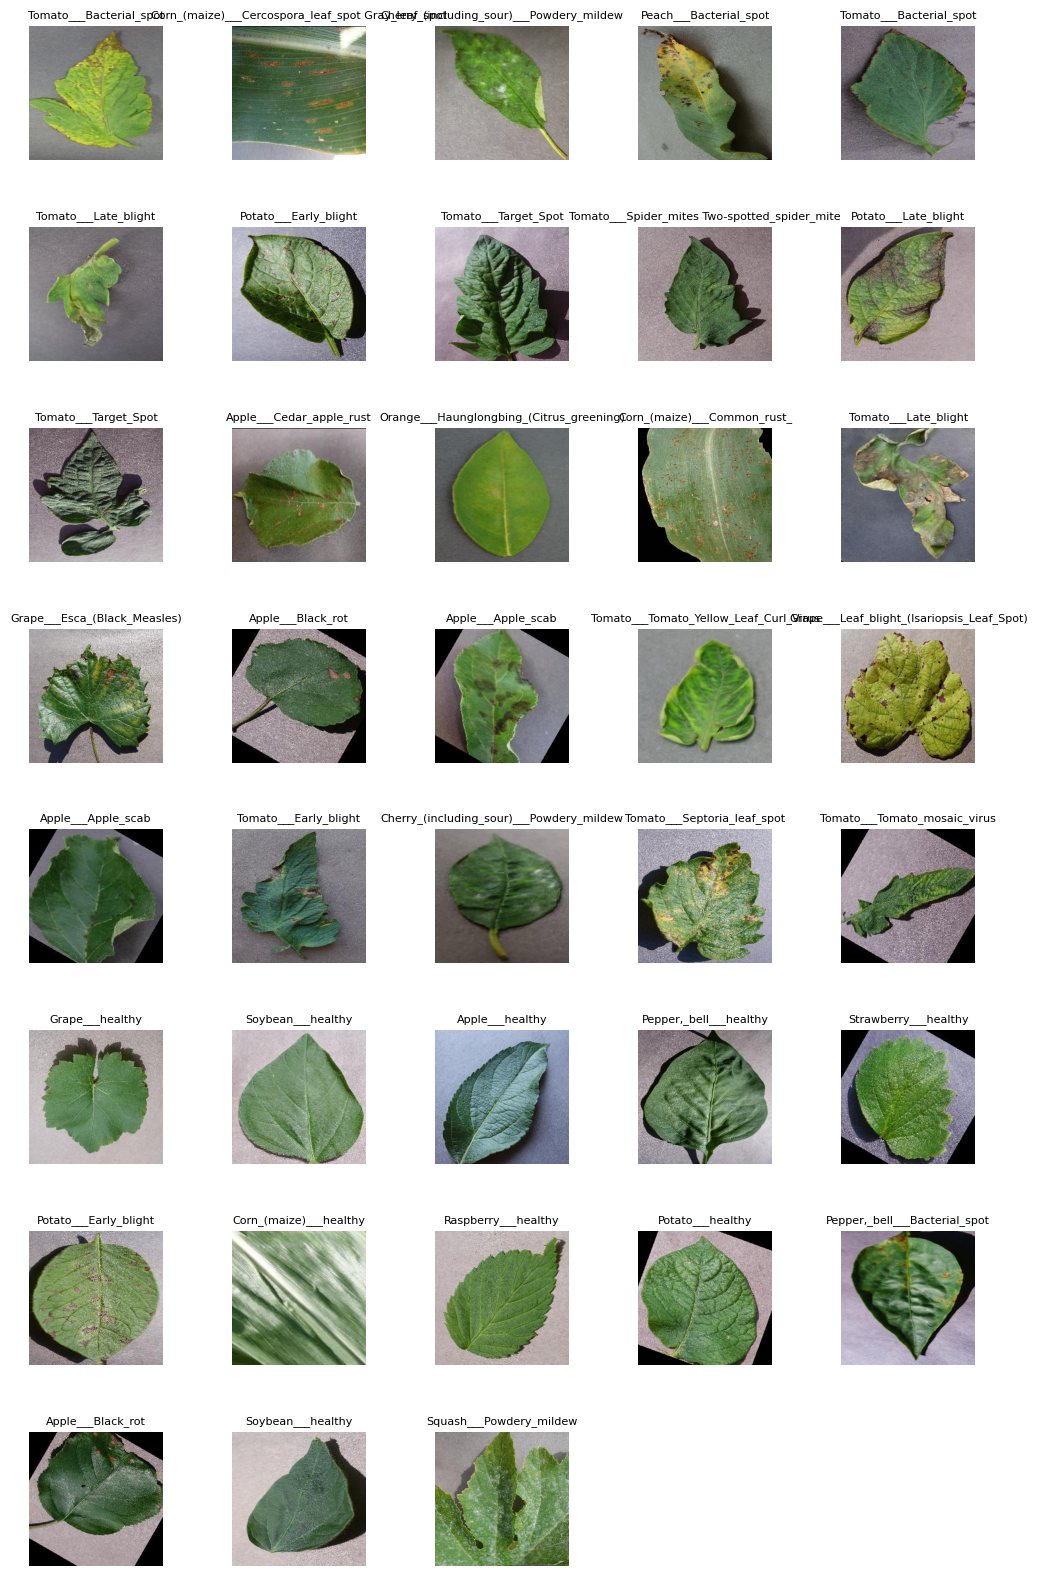

In [7]:
import matplotlib.pyplot as plt
import os
import random
import math
from PIL import Image

fig = plt.figure(figsize=(15, 10))
num_images = 38

class_names = os.listdir(train_dir)
images = []
labels = []

# Ensure we have enough classes and images
if len(class_names) == 0:
    print("No classes found in the training directory.")
else:
    images_per_class_to_sample = num_images // len(class_names) + 1
    for class_name in class_names:
        class_path = os.path.join(train_dir, class_name)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
            if len(image_files) > 0:
                sampled_images = random.sample(image_files, min(len(image_files), images_per_class_to_sample))
                for img_file in sampled_images:
                    img_path = os.path.join(class_path, img_file)
                    try:
                        img = Image.open(img_path).convert('RGB')
                        images.append(img)
                        labels.append(class_name)
                    except Exception as e:
                        print(f"Could not open or process image {img_path}: {e}")

    if len(images) < num_images:
        print(f"Only {len(images)} images found. Using all available images.")
    if len(images) > num_images:
        indices = random.sample(range(len(images)), num_images)
        images = [images[i] for i in indices]
        labels = [labels[i] for i in indices]

    # Calculate grid size dynamically
    cols = 5  # You can adjust this if you prefer wider/narrower grids
    rows = math.ceil(len(images) / cols)

    fig = plt.figure(figsize=(cols * 2.5, rows * 2.5))

    for i in range(len(images)):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.imshow(images[i])
        ax.set_title(labels[i], fontsize=8)
        ax.axis('off')

    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    plt.show()


Classes found: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tom

<Figure size 1500x1000 with 0 Axes>

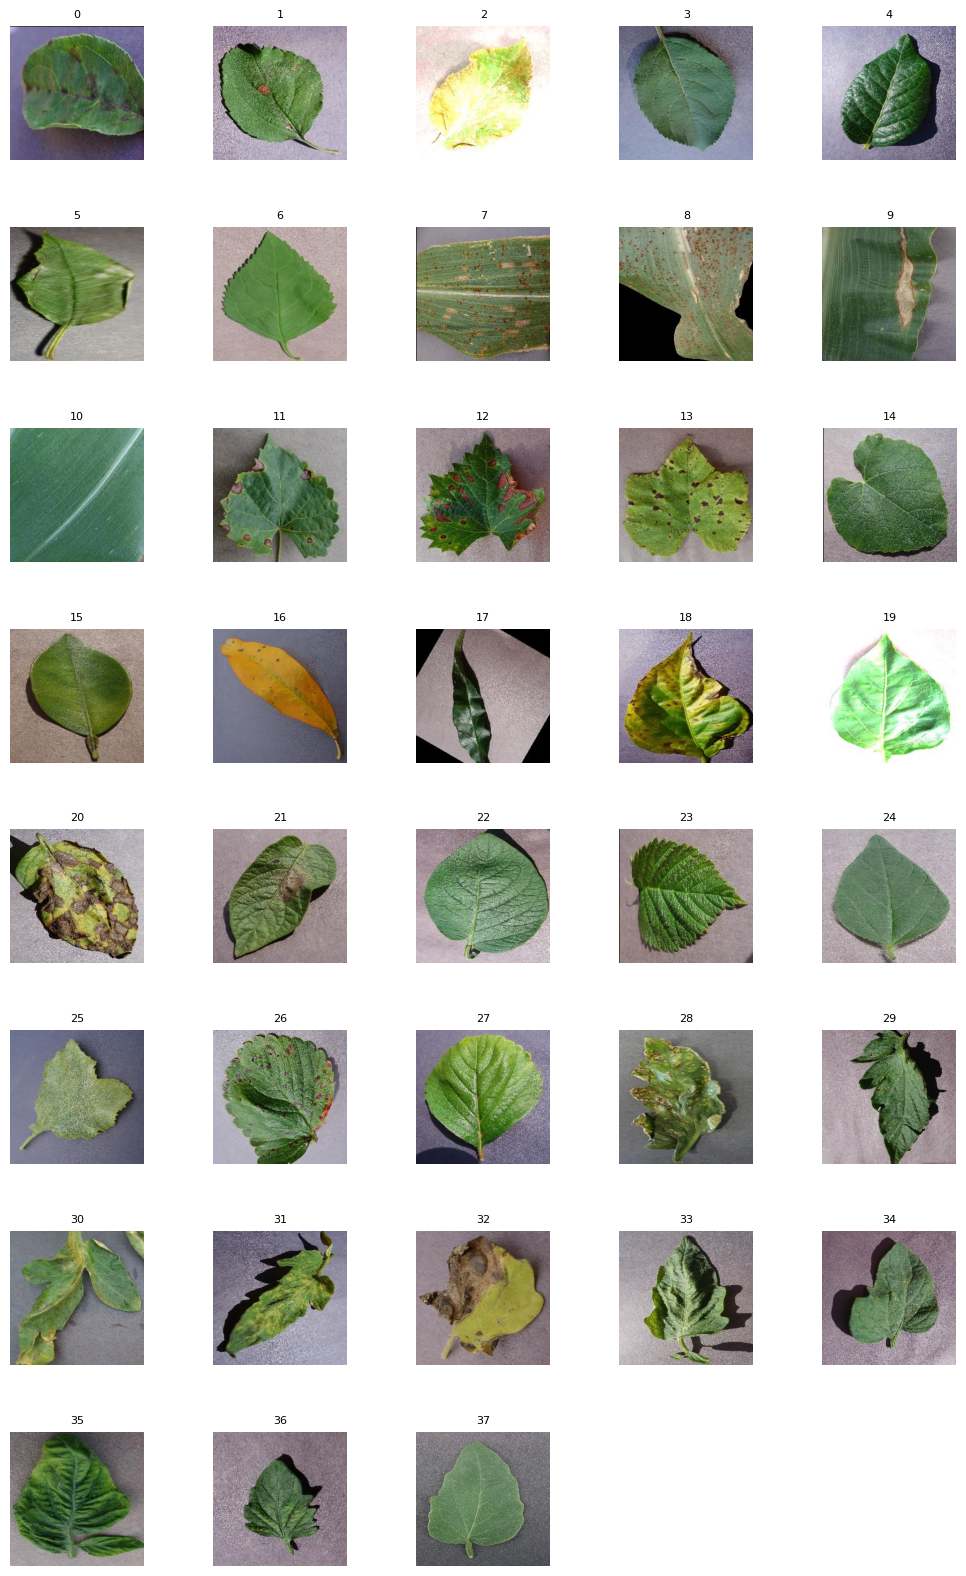

In [22]:
import matplotlib.pyplot as plt
import os
import math
import random
from PIL import Image

fig = plt.figure(figsize=(15, 10))
num_images = 38  # We will aim for up to this many, one per class ideally

class_names = sorted(os.listdir(train_dir))  # Consistent order
images_labels = []

if len(class_names) == 0:
    print("No classes found in the training directory.")
else:
    print(f"Classes found: {class_names}")

    for idx, class_name in enumerate(class_names):
        class_path = os.path.join(train_dir, class_name)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
            if len(image_files) > 0:
                # Randomly choose any image from the class
                img_file = random.choice(image_files)
                img_path = os.path.join(class_path, img_file)
                try:
                    img = Image.open(img_path).convert('RGB')
                    images_labels.append((img, str(idx)))
                except Exception as e:
                    print(f"Could not open or process image {img_path}: {e}")
        else:
            print(f"Skipped non-directory entry: {class_name}")

        if len(images_labels) >= num_images:
            break

    # Sort by label for display
    images_labels.sort(key=lambda x: int(x[1]))

    # Grid setup
    cols = 5
    rows = math.ceil(len(images_labels) / cols)

    fig = plt.figure(figsize=(cols * 2.5, rows * 2.5))

    for i, (img, label) in enumerate(images_labels):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.imshow(img)
        ax.set_title(label, fontsize=8)
        ax.axis('off')

    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    plt.show()
